#  <center>Module 10 Homework
## <center>ISE-529
### <center>Aditya Shrikant Chavan
<center> USC ID 8741411805    

1)  For this problem, we will be using a wage dataset to develop tree-based models to predict salary ("wage") based on age (in thousands of dollars), education, health, job classification, and health insurance (whether health insurance is offered)

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

1a)  Read in the datasaet and convert string variables to appropriate numeric values.  Convert nominal categories to binary dummy variables and ordinal categories to appropriate integer-valued variables.  Display the first ten rows of your dataframe.

In [2]:
data=pd.read_csv("wage_data.csv")
data['education'] = data['education'].replace({'1. < HS Grad':1, '2. HS Grad':2, '3. Some College':3,'4. College Grad':4,'5. Advanced Degree':5})
data['health']= data['health'].replace({'1. <=Good':0, '2. >=Very Good':1})
data['jobclass'] = data['jobclass'].replace({'1. Industrial':0, '2. Information':1})
data['health_ins'] = data['health_ins'].replace({'1. Yes':0, '2. No':1})
data.head(10)

,age,education,jobclass,health,health_ins,wage
0,18,1,0,0,1,75.043154
1,24,4,1,1,1,70.476020
2,45,3,0,0,0,130.982177
3,43,4,1,1,0,154.685293
4,50,2,1,0,0,75.043154
5,54,4,1,1,0,127.115744
6,44,3,0,1,0,169.528538
7,30,3,1,0,0,111.720849
8,41,3,1,1,0,118.884359
9,52,2,1,1,0,128.680488


1b)  Split the dataset into an 80% training partition and a 20% test partition (set random_state = 0).  Create a deision tree regression model with a maximum depth of three levels.  Set random_state = 0.  Plot your decision tree.

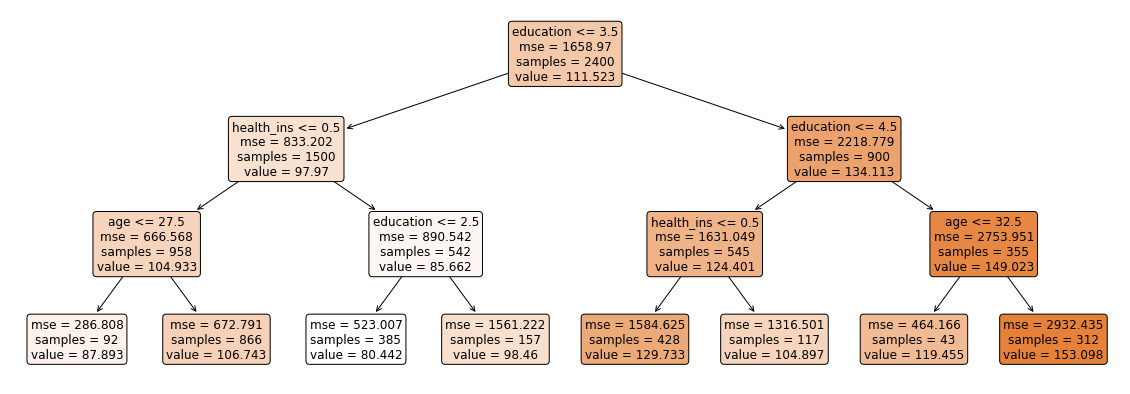

In [3]:
#step 1 Splitting Data
X = data.drop('wage',axis=1)
y = data['wage']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
#Step 2 Creating model
model = DecisionTreeRegressor(max_depth=3, random_state=0)
d_tree_model = model.fit(X_train, y_train)
#step 3 Plotting the tree
plt.rcParams['figure.figsize'] = [20,7]
tree.plot_tree(model, feature_names = X.columns, fontsize=12, filled=True, rounded=True)
plt.show()

1c)  What would be the predicted wage for a 45-year old person with an advanced degree in an "informational" job classification with Very Good health and health insurance?

In [4]:
test_case=[45,5,1,1,0]
answer=model.predict([test_case])
print(f'The wage for the given person will be {answer}')

The wage for the given person will be [153.09814027]


1d)  Calculate the test MSE for this tree

In [5]:
y_pred = model.predict(X_test)
test_mse = mse(y_pred, y_test)
print(f'MSE for the Decision tree is {test_mse}')

MSE for the Decision tree is 1526.4572521226592


1e)  We are going to try to improve our model using cost complexity pruning.  Following the lecture example, crete a "cost complexity pruning path (using random_state = 0) and plot the resulting model $R^2$ values as a function of different effective alphas.

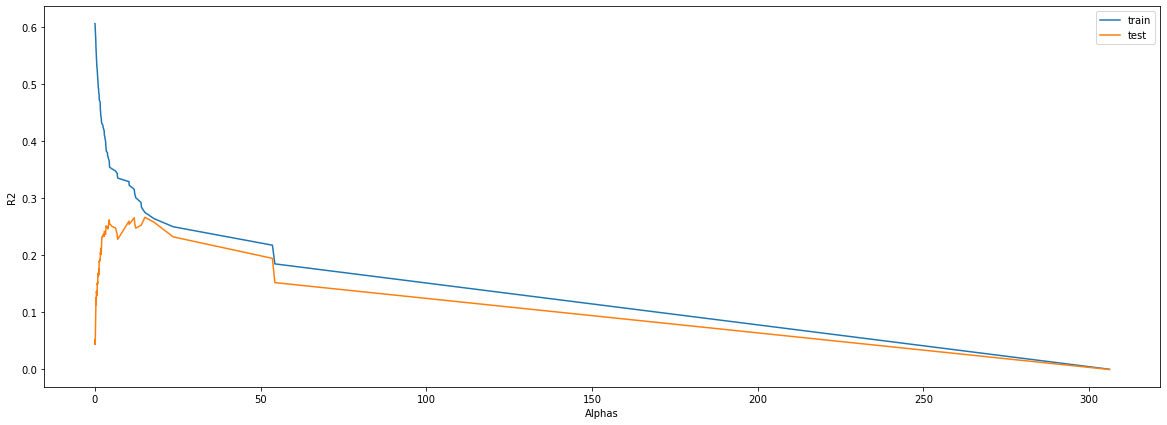

In [6]:
model_2 = DecisionTreeRegressor(random_state=0)
cc_model = model_2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas  = cc_model.ccp_alphas
ccp_impurities=cc_model.impurities


y_predictions = []
models = []
r2_scores = []
for ccp_alpha in ccp_alphas:
 model_cc = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
 model_cc.fit(X_train, y_train)
 models.append(model_cc)


r2_model_train = [mod.score(X_train, y_train) for mod in models]
r2_model_test = [mod.score(X_test, y_test) for mod in models]
fig, ax = plt.subplots()
ax.plot(ccp_alphas, r2_model_train, label="train")
ax.plot(ccp_alphas, r2_model_test, label="test")
ax.set_xlabel('Alphas')
ax.set_ylabel('R2')
ax.legend()
plt.show()

1f)  Find the precise alpha that results in a maximum test $R^2$

In [7]:
best_alpha = ccp_alphas[np.argmax(r2_model_test)]
print(f'Alpha corresponding to the maximum R2 is {best_alpha}')


Alpha corresponding to the maximum R2 is 15.085135808685862


1g)  What is the mean square error of a decision tree constructed using the "best alpha" that you calculated in the previous step?

In [8]:
best_dtree = DecisionTreeRegressor(ccp_alpha = best_alpha)
y_preds_ccp = best_dtree.fit(X_train, y_train).predict(X_test)
mse_ccp = mse(y_test, y_preds_ccp)
print(f'The MSE for the best alpha comes around is {mse_ccp}')

The MSE for the best alpha comes around is 1516.793135477847


1h)  Find the variable importances for this best alpha tree.  What is the most important variable in predicting wage?

In [9]:
feat_importance = pd.DataFrame(data=best_dtree.feature_importances_*1000, index=X.columns,columns=["Importance"])
feat_importance


,Importance
age,39.128757
education,791.427721
jobclass,0.000000
health,0.000000
health_ins,169.443522


1i)  Create a random forest model for this dataset based on randomly selecting 3 features at each decision node.  Set the random_state=0.  What is the model's MSE?

In [10]:
rf_model = RandomForestRegressor(max_features=3, random_state=0)
y_preds = rf_model.fit(X_train, y_train).predict(X_test)
mse_rf = mse(y_preds, y_test)
print(f'MSE for Random Forest Regressor is {mse_rf}')

MSE for Random Forest Regressor is 1678.5068937686249


1j)  Create a gradient boosting model for this dataset based on using 5000 estimators.  Set the random_state=0.  What is the model's MSE?

In [11]:
gbr_model = GradientBoostingRegressor(n_estimators=5000, random_state=0)
y_preds_gbr = gbr_model.fit(X_train, y_train).predict(X_test)
mse_gbr = mse(y_preds_gbr, y_test)
print(f'MSE for this model is {mse_gbr}')

MSE for this model is 1662.2267534120494
